# The Data Science Lifecycle

## 1. Business Understanding

This investigation involves the exploration of a Black Friday dataset collected in 2018 by Analytics Vidhya. The dataset itself includes missing values. The dataset is a sample of the transactions made in a retail store. The business in question would like to understand customer purchase behaviour against different products. The problem here is therefore a **regression** problem; the store would like to predict the *amount of purchase* with the help of the information in all of the other feature variables. The feature variables include *User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1, Product_Category_3, Purchase*. There also exists a **categorical** problem which involves predicting the product category that makes up an individuals purchase based upon their characteristics. Lets start with the regression problem...

## 2. Data Mining

The data itself was collected by Analytics Vidhya and was available to download as a csv from their website - easy!

## 3. Data Cleaning

The dataset itself has a number of missing values. Furthermore, for a regression problem we need to turn categorical data in to one-hot feature vectors. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head(5)

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [5]:
test.head(5)

User_ID Product_ID Gender    Age  Occupation City_Category  \
0  1000004  P00128942      M  46-50           7             B   
1  1000009  P00113442      M  26-35          17             C   
2  1000010  P00288442      F  36-45           1             B   
3  1000010  P00145342      F  36-45           1             B   
4  1000011  P00053842      F  26-35           1             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               1                   1   
1                          0               0                   3   
2                         4+               1                   5   
3                         4+               1                   4   
4                          1               0                   4   

   Product_Category_2  Product_Category_3  
0                11.0                 NaN  
1                 5.0                 NaN  
2                14.0                 NaN  
3                 9.0                 NaN  
4                 5.0                12.0

In [6]:
# Let's found out how many null values there are and where they occur.

train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
# We can replace missing values with the modeal category of that column with ease with pandas.

train['Product_Category_2'].fillna(train['Product_Category_2'].value_counts().idxmax(),inplace=True)
train['Product_Category_3'].fillna(train['Product_Category_3'].value_counts().idxmax(),inplace=True)
test['Product_Category_2'].fillna(test['Product_Category_2'].value_counts().idxmax(),inplace=True)
test['Product_Category_3'].fillna(test['Product_Category_3'].value_counts().idxmax(),inplace=True)

train.head(5)

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 8.0                16.0      8370  
1                 6.0                14.0     15200  
2                 8.0                16.0      1422  
3                14.0                16.0      1057  
4                 8.0                16.0      7969

In [8]:
# Now we turn to encoding categorical datatypes - the first stage of this is checking the datatypes.

train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [9]:
# First we need to investigate the cardinality of each variable, for example:

train['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [10]:
train['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [11]:
train['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [12]:
# Because "train["Product_ID"].value_counts()" produces so many unique values (well, there are a lot of products
# right...) we can not conduct a find and replace method. Fortunately pandas supplies is with the ability to perform
# label encoding. Again because of the number of unique products we can't perform one-hot label encoding as this would
# simply add too many columns to our dataset.

train['Product_ID'] = train['Product_ID'].astype('category').cat.codes
train['Gender'] = train['Gender'].astype('category').cat.codes
train['Age'] = train['Age'].astype('category').cat.codes
train['City_Category'] = train['City_Category'].astype('category').cat.codes
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].astype('category').cat.codes
test['Product_ID'] = test['Product_ID'].astype('category').cat.codes
test['Gender'] = test['Gender'].astype('category').cat.codes
test['Age'] = test['Age'].astype('category').cat.codes
test['City_Category'] = test['City_Category'].astype('category').cat.codes
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].astype('category').cat.codes

train.dtypes
train.head()

User_ID  Product_ID  Gender  Age  Occupation  City_Category  \
0  1000001         672       0    0          10              0   
1  1000001        2376       0    0          10              0   
2  1000001         852       0    0          10              0   
3  1000001         828       0    0          10              0   
4  1000002        2734       1    6          16              2   

   Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                           2               0                   3   
1                           2               0                   1   
2                           2               0                  12   
3                           2               0                  12   
4                           4               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 8.0                16.0      8370  
1                 6.0                14.0     15200  
2                 8.0                16.0      1422  
3                14.0                16.0      1057  
4                 8.0                16.0      7969

## Data Exploration

The next stage involves forming a hypotheses about the defined problem. They key here is finding a way to visualise the dataset in an informative way to test hypotheses. The dependent variable here is purchase, or in other words, this is the variable we might like to given all of the other variables. Beginning with plots of one variable against "Purchase" seems like a good place to start, especially to give us an idea of feature importance.

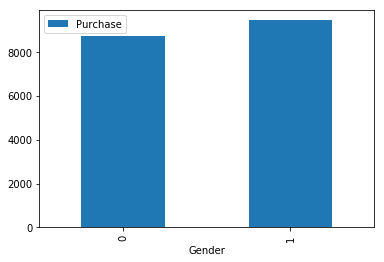

In [13]:
# First lets look at "Gender" where 0=F and 1=M. 

gender_df = train.groupby('Gender').mean()[['Purchase']]
gender_df.plot(kind="bar")

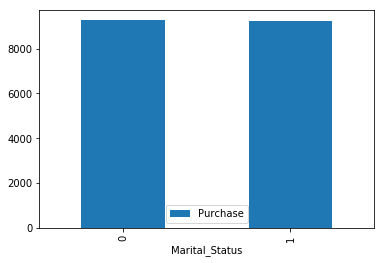

In [14]:
# Next lets look at "Marital_Status" where 0=unmarried and 1=married.

married_df = train.groupby('Marital_Status').mean()[['Purchase']]
married_df.plot(kind="bar")

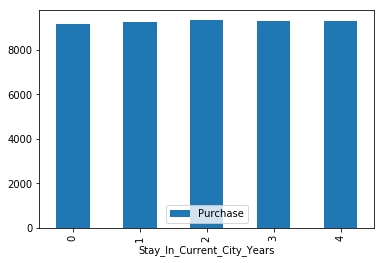

In [15]:
# Now lets look at "Stay_In_Current_City_Years" where the categories relate to number of years and 4 may be 
# interpreted as 4 or more years

current_city_year_df = train.groupby('Stay_In_Current_City_Years').mean()[['Purchase']]
current_city_year_df.plot(kind="bar")

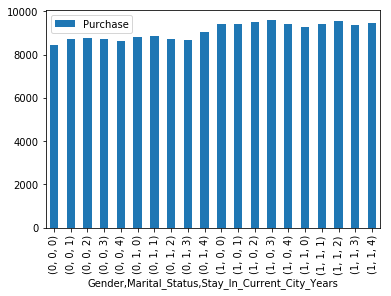

In [16]:
# Lets look at something more complicated, lets say, unmarried woman who have lived in a city for "x" number of
# years.

complex_groupby_df = train.groupby(['Gender','Marital_Status','Stay_In_Current_City_Years']).mean()[['Purchase']]
complex_groupby_df.plot(kind="bar")

There are clearly a lot of attributes and therefore combination of attributes that might lead to a good predictor of purchase amount, which is the variable we wish to predict. We see that the average purchase price of people grouped in different characters remains largely the same, fluctuating differently about a rather stubborn mean. More exploratory analysis is needed by a feature engineering step to ascertain the importance of each feature as a predictor of purchase amount.

## Feature Engineering

In [17]:
# First we can normalize our features.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sort data

X_train = train.drop(['User_ID','Product_ID','Purchase'],axis=1)
y_train = train['Purchase']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.4, random_state=0)

# Normalise features

SS = StandardScaler()
X_train_norm = pd.DataFrame(SS.fit_transform(X_train),columns=X_train.columns)
X_test_norm = pd.DataFrame(SS.fit_transform(X_test),columns=X_test.columns)

In [18]:
# Perform a Random Forest feature selection method to see which features are the most important.

from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0, n_jobs=-1)
random_forest_classifier.fit(X_train_norm, y_train)

# Print the name and gini importance of each feature

feature_labels = ['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']
for feature in zip(feature_labels, random_forest_classifier.feature_importances_):
    print(feature)

('Gender', 0.04958422080323789)
('Age', 0.14597735880989413)
('Occupation', 0.1811293631701454)
('City_Category', 0.08490721985213426)
('Stay_In_Current_City_Years', 0.1373985570109272)
('Marital_Status', 0.06248554799095255)
('Product_Category_1', 0.16624158418405027)
('Product_Category_2', 0.08820185791507176)
('Product_Category_3', 0.08407429026358651)


In [19]:
# Create a selector object that will use the random forest classifier to identify features that have 
# an importance of more than 0.10

from sklearn.feature_selection import SelectFromModel

random_forest_classifier_10 = SelectFromModel(random_forest_classifier, threshold=0.10)

# Train this selector

random_forest_classifier_10.fit(X_train_norm, y_train)

# Print the names of the most important features

for feature_list_index in random_forest_classifier_10.get_support(indices=True):
    print(feature_labels[feature_list_index])

Age
Occupation
Stay_In_Current_City_Years
Product_Category_1


In [20]:
# Create a new dataset containing only the most important features

X_train_important = random_forest_classifier_10.transform(X_train_norm)
X_test_important = random_forest_classifier_10.transform(X_test_norm)
print("The new arrays now have a shape of (_,4): ",np.shape(X_train_important))

The new arrays now have a shape of (_,4):  (330040, 4)


## Modelling and Data Visualisation

**1) Neural Network**

**a) Important Features**

Let us try to model the data using a neural network, which takes in the four features "Age", "Occupation", "Stay_In_Current_City_Years" and "Product_Category_1".

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model_best = Sequential()
model_best.add(Dense(1024,input_dim=4, activation='relu'))
model_best.add(Dense(512, activation='relu'))
model_best.add(Dense(256, activation='relu'))
model_best.add(Dense(128,activation='relu'))
model_best.add(Dense(64,activation='relu'))
model_best.add(Dense(1,activation='linear'))
model_best.compile(loss="mean_absolute_error",optimizer="adam",metrics=["mean_absolute_error"])
model_best.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1024)              5120      
_________________________________________________________________
dense_14 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_15 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 65        
Total params: 702,465
Trainable params: 702,465
Non-trainable params: 0
_________________________________________________________________


In [23]:
from keras.callbacks import ModelCheckpoint

checkpoint_name = 'Weights_Best-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 0, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [24]:
print(X_train_important)

[[ 1.11207761  1.67575245  1.65619456  1.42088858]
 [ 0.37381375 -1.08529921  0.10735446 -0.1034847 ]
 [ 0.37381375 -0.16494866  0.10735446  2.69119966]
 ...
 [ 1.11207761  1.06218541 -0.66706559 -0.1034847 ]
 [-1.10271398 -0.62512394 -1.44148564 -0.86567135]
 [ 2.58860533  1.36896893 -1.44148564  0.65870194]]


In [155]:
model_best.fit(X_train_important[:50000], y_train[:50000], epochs=50, batch_size=32, validation_split = 0.2, callbacks=callbacks_list,verbose=0)

In [156]:
weights_file = 'Weights_Best-039--2206.90228.hdf5'
model_best.load_weights(weights_file)
model_best.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

Neural Network validation MAE =  2252.972618461609


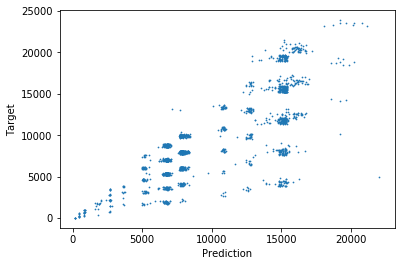

In [157]:
predictions_NN_best = model_best.predict(X_test_important[:2000])

MAE_Best = mean_absolute_error(y_test[:2000], predictions_NN_best)
print('Neural Network validation MAE = ',MAE_Best)

import matplotlib.pyplot as plt

plt.scatter(predictions_NN_best,y_test[:2000],s=0.5)
plt.xlabel("Prediction")
plt.ylabel("Target")
plt.show()

**b) All features**

In [158]:
import keras
from keras.models import Sequential

model_all = Sequential()
model_all.add(Dense(1024,input_dim=9, activation='relu'))
model_all.add(Dense(512, activation='relu'))
model_all.add(Dense(256, activation='relu'))
model_all.add(Dense(128,activation='relu'))
model_all.add(Dense(64,activation='relu'))
model_all.add(Dense(1,activation='linear'))

model_all.compile(loss="mean_absolute_error",optimizer="adam",metrics=["mean_absolute_error"])
model_all.summary()

from keras.callbacks import ModelCheckpoint

checkpoint_name = 'Weights_All-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 0, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

model_all.fit(X_train_norm[:50000].values, y_train[:50000], epochs=50, batch_size=32, validation_split = 0.2, callbacks=callbacks_list,verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_175 (Dense)            (None, 1024)              10240     
_________________________________________________________________
dense_176 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_177 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_178 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_179 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_180 (Dense)            (None, 1)                 65        
Total params: 707,585
Trainable params: 707,585
Non-trainable params: 0
_________________________________________________________________


Neural Network validation MAE =  2273.850525985718


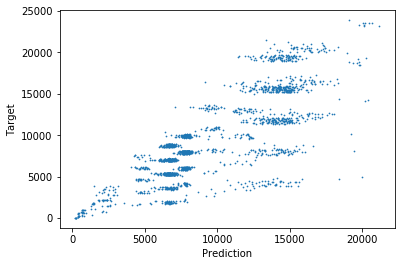

In [159]:
weights_file = 'Weights_All-034--2212.99989.hdf5'
model_all.load_weights(weights_file)
model_all.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

predictions_NN_All = model_all.predict(X_test_norm[:2000].values)

MAE_All = mean_absolute_error(y_test[:2000], predictions_NN_All)
print('Neural Network validation MAE = ',MAE_All)

import matplotlib.pyplot as plt

plt.scatter(predictions_NN_All,y_test[:2000],s=0.5)
plt.xlabel("Prediction")
plt.ylabel("Target")
plt.show()

**2) Linear Regression**

Accuracy Score of Linear Regression on test set 11.94736503719228
Linear Regression validation MAE =  3624.693046007106


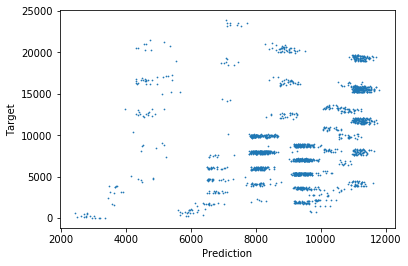

In [167]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model_fit_LR = model.fit(X_train_important[:50000],y_train[:50000])

predictions_LR = model.predict(X_test_important[:2000])
MAE = mean_absolute_error(y_test[:2000] , predictions_LR)
print("Accuracy Score of Linear Regression on test set",model_fit_LR.score(X_test_important,y_test)*100)
print('Linear Regression validation MAE = ', MAE)

import matplotlib.pyplot as plt

plt.scatter(predictions_LR,y_test[:2000],s=0.5)
plt.xlabel("Prediction")
plt.ylabel("Target")
plt.show()

**3) Random Forest Regressor**

I think from above we are justified in only taking the "important features".

Accuracy Score of Random Forests on test set 61.63122233849232
Random forest validation MAE =  2335.745079125086


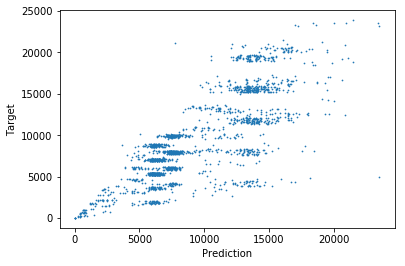

In [161]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 

model = RandomForestRegressor()
model_fit_RFR = model.fit(X_train_important[:50000],y_train[:50000])

predictions_RFR = model.predict(X_test_important[:2000])
MAE = mean_absolute_error(y_test[:2000] , predictions_RFR)
print("Accuracy Score of Random Forests on test set",model_fit_RFR.score(X_test_important,y_test)*100)
print('Random forest validation MAE = ', MAE)

import matplotlib.pyplot as plt

plt.scatter(predictions_RFR,y_test[:2000],s=0.5)
plt.xlabel("Prediction")
plt.ylabel("Target")
plt.show()

**4) XGBoost model**

Accuracy Score of XGBoost model on test set 63.849302784616135
XGBoost validation MAE =  2329.7008525543215


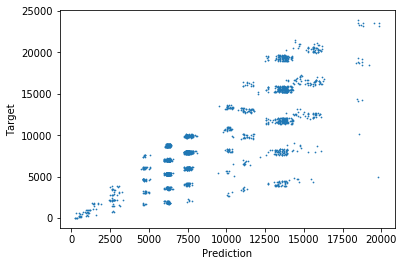

In [162]:
from xgboost import XGBRegressor

model = XGBRegressor()
model_fit_XGB = model.fit(X_train_important[:50000],y_train[:50000])

predictions_XGB = model.predict(X_test_important[:2000])
MAE = mean_absolute_error(y_test[:2000], predictions_XGB)
print("Accuracy Score of XGBoost model on test set",model_fit_XGB.score(X_test_important,y_test)*100)
print('XGBoost validation MAE = ',MAE)

import matplotlib.pyplot as plt

plt.scatter(predictions_XGB,y_test[:2000],s=0.5)
plt.xlabel("Prediction")
plt.ylabel("Target")
plt.show()

**5) Neural Network again?**

We might therefore conclude that neural networks beat the random forest regressor and the XGBoost regressor. With this in mind we might want to train our neural network on more data and for longer...

In [163]:
import keras
from keras.models import Sequential

model_big = Sequential()
model_big.add(Dense(1024,input_dim=4, activation='relu'))
model_big.add(Dense(512, activation='relu'))
model_big.add(Dense(256, activation='relu'))
model_big.add(Dense(128,activation='relu'))
model_big.add(Dense(64,activation='relu'))
model_big.add(Dense(32,activation='relu'))
model_big.add(Dense(1,activation='linear'))

model_big.compile(loss="mean_absolute_error",optimizer="adam",metrics=["mean_absolute_error"])
model_big.summary()

from keras.callbacks import ModelCheckpoint

checkpoint_name = 'WeightsFinal-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 0, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

model_big.fit(X_train_important[:500000], y_train[:500000], epochs=500, batch_size=64, validation_split = 0.2, callbacks=callbacks_list,verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_181 (Dense)            (None, 1024)              5120      
_________________________________________________________________
dense_182 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_183 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_184 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_185 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_186 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_187 (Dense)            (None, 1)                 33        
Total para

Neural Network validation MAE =  2212.060080718994


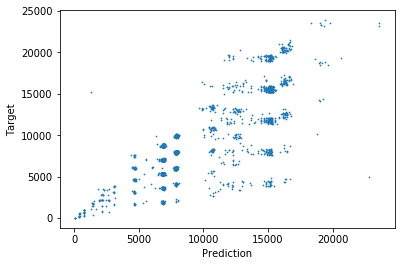

In [165]:
weights_file = 'WeightsFinal-494--2193.97338.hdf5'
model_big.load_weights(weights_file)
model_big.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
predictions_NN_big = model_big.predict(X_test_important[:2000])

MAE_Big = mean_absolute_error(y_test[:2000], predictions_NN_big)
print('Neural Network validation MAE = ',MAE_Big)

import matplotlib.pyplot as plt

plt.scatter(predictions_NN_big,y_test[:2000],s=0.5)
plt.xlabel("Prediction")
plt.ylabel("Target")
plt.show()